In [1]:
import torch
import numpy as np
from torch import nn

# Note: this notebook requires torch >= 1.10.0
torch.__version__

'1.13.0+cu116'

In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
# Connect Google Drive to a Google Colab Notebook for Dataset
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [4]:
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
print(data_path)
dataset_path = data_path / "ntu" / "ntu"
print(dataset_path)

# If the image folder doesn't exist, download it and prepare it... 
if dataset_path.is_dir():
    print(f"{dataset_path} directory exists.")
else:
    print(f"Did not find {data_path} directory, creating one...")
    dataset_path.mkdir(parents=True, exist_ok=True)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile('/content/gdrive/MyDrive/ntu.zip', "r") as zip_ref:
        print("Unzipping sample dataset") 
        zip_ref.extractall(data_path)

data
data/ntu/ntu
Did not find data directory, creating one...
Unzipping sample dataset


In [5]:
required_classes_list = ["A041", "A042", "A043", "A044", "A045", "A046", "A047", "A048", "A049", "A103", "A104", "A105"]

In [6]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [7]:
walk_through_dir(data_path)

There are 1 directories and 0 images in 'data'.
There are 1 directories and 0 images in 'data/ntu'.
There are 2 directories and 0 images in 'data/ntu/ntu'.
There are 3 directories and 0 images in 'data/ntu/ntu/train'.
There are 0 directories and 350 images in 'data/ntu/ntu/train/A041'.
There are 0 directories and 360 images in 'data/ntu/ntu/train/A043'.
There are 0 directories and 415 images in 'data/ntu/ntu/train/A042'.
There are 3 directories and 0 images in 'data/ntu/ntu/test'.
There are 0 directories and 123 images in 'data/ntu/ntu/test/A041'.
There are 0 directories and 119 images in 'data/ntu/ntu/test/A043'.
There are 0 directories and 115 images in 'data/ntu/ntu/test/A042'.


In [8]:
# Setup train and testing paths
train_dir = dataset_path / "train"
test_dir = dataset_path / "test"

train_dir, test_dir

(PosixPath('data/ntu/ntu/train'), PosixPath('data/ntu/ntu/test'))

In [9]:
import random

# Set seed
random.seed(42) 

# 1. Get all skeleton paths (* means "any combination")
skeleton_path_list = list(dataset_path.glob("*/*/*.npy"))

# 2. Get random skeleton path
random_skeleton_path = random.choice(skeleton_path_list)

# 3. Get skeleton class from path name (the skeleton class is the name of the directory where the skeleton is stored)
skeleton_class = random_skeleton_path.parent.stem

# 5. Print metadata
print(f"Random image path: {random_skeleton_path}")
print(f"Image class: {skeleton_class}")

Random image path: data/ntu/ntu/test/A043/S007C003P027R001A043.skeleton.npy
Image class: A043


In [10]:
data = np.load(random_skeleton_path ,allow_pickle=True).item()
data.keys()

dict_keys(['file_name', 'nbodys', 'njoints', 'skel_body0', 'rgb_body0', 'depth_body0'])

In [11]:
data['skel_body0'].shape

(74, 25, 3)

In [12]:
data['skel_body0'][60]

array([[-2.086546e-02, -7.065356e-01,  3.568279e+00],
       [ 1.244150e-01, -4.864027e-01,  3.428575e+00],
       [ 2.753175e-01, -2.667619e-01,  3.289762e+00],
       [ 2.567353e-01, -1.536084e-01,  3.241626e+00],
       [ 1.205166e-01, -3.059779e-01,  3.335961e+00],
       [ 1.601031e-02, -4.021871e-01,  3.183116e+00],
       [-3.492816e-02, -3.852966e-01,  2.912973e+00],
       [-9.482063e-02, -4.310053e-01,  2.769917e+00],
       [ 4.120527e-01, -3.243021e-01,  3.240060e+00],
       [ 4.358612e-01, -5.565153e-01,  3.250648e+00],
       [ 3.663059e-01, -6.007693e-01,  2.996197e+00],
       [ 3.539324e-01, -6.189399e-01,  2.937904e+00],
       [-7.174402e-02, -6.675053e-01,  3.534452e+00],
       [-8.821864e-02, -4.946834e-01,  3.250212e+00],
       [-5.179534e-02, -8.309766e-01,  3.260287e+00],
       [-1.496708e-01, -8.112829e-01,  3.151446e+00],
       [ 2.908623e-02, -7.305440e-01,  3.521418e+00],
       [ 3.047437e-01, -6.270344e-01,  3.009408e+00],
       [ 1.147167e-01, -8.48

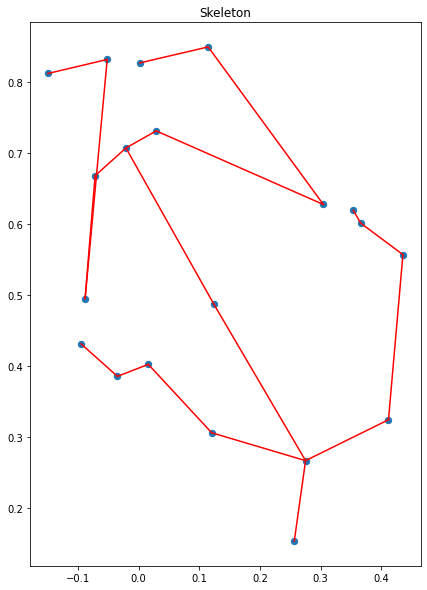

In [13]:
import matplotlib.pyplot as plt
import numpy as np


movement = data['skel_body0'][60][:20]
# print(movement)
bone_list = [[1, 2], [1, 17], [1, 13], [17, 18], [18, 19], [19, 20], [13, 14],
            [14, 15], [15, 16], [2, 3], [3, 9], [3, 5], [3, 4],
            [5, 6], [9, 10], [10, 11], [11, 12], [6, 7], [7, 8]]

bone_list = np.array(bone_list) - 1
number_of_postures = int(len(movement)/20)

for i in range(number_of_postures):
    fig, ax = plt.subplots(1, figsize=(7, 10))
    plt.title('Skeleton')
    # plt.xlim(100, 180)
    # plt.ylim(-250, 0)
    skeleton = movement[i*20:(i+1)*20]

    x = skeleton[:, 0]
    y = -skeleton[:, 1]

    sc = ax.scatter(x, y, s=40)
    for bone in bone_list:
        ax.plot([x[bone[0]], x[bone[1]]], [y[bone[0]], y[bone[1]]], 'r')

In [14]:
data['skel_body0'].shape[0]

74

In [15]:
def keyframing(input_skel, SEQ=30):
  frame_count = input_skel.shape[0]
  # print(frame_count)
  skip_frames_window = max(int(frame_count/SEQ), 1)

  new_mat = []
  for frame_counter in range(SEQ):
    frame_index = frame_counter * skip_frames_window
    new_mat.append(input_skel[frame_index])
  return np.array(new_mat)

In [34]:
# # len(skeleton_path_list)

# for path in skeleton_path_list:
#   data = np.load(path ,allow_pickle=True).item()["skel_body0"][:, :20]
#   print(keyframing(data).shape)

In [16]:
import math
def npy_loader(path, SEQ=30):
    data = np.load(path ,allow_pickle=True).item()["skel_body0"][:, :20]
    sample = keyframing(data)
    
    mat = np.zeros([19,3])
    # print(mat)
    for i in range(sample.shape[0]):
        new_mat = sample[i][1:] - sample[:, 0][i]
        # print(new_mat)
        ax, ay, az = new_mat[0]
        bx, by, bz = new_mat[1]

        dist = math.sqrt((ax-bx)**2 + (ay-by)**2 + (az-bz)**2)
        scale = dist/23.5

        new_mat = new_mat * scale
        mat = np.dstack((mat, new_mat))
        # print(mat)
    
    
    sample = torch.from_numpy(mat)
    sample = sample.permute(2, 0, 1)
    return sample[1:]

In [17]:
temp = npy_loader(random_skeleton_path)
temp.shape

torch.Size([30, 19, 3])

In [18]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.DatasetFolder(root=train_dir, # target folder of images
                                    loader=npy_loader,
                                    extensions=['.npy'],
                                  # transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.DatasetFolder(root=test_dir,
                                 loader=npy_loader,
                                 extensions=['.npy']
                                #  ,transform=data_transform
                                 )

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset DatasetFolder
    Number of datapoints: 1125
    Root location: data/ntu/ntu/train
Test data:
Dataset DatasetFolder
    Number of datapoints: 357
    Root location: data/ntu/ntu/test


In [19]:
# Get class names as a list
class_names = train_data.classes
class_names

['A041', 'A042', 'A043']

In [20]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'A041': 0, 'A042': 1, 'A043': 2}

In [21]:
# Check the lengths
len(train_data), len(test_data)

(1125, 357)

In [22]:
data, label = train_data[500][0], train_data[500][1]
print(f"data tensor:\n{data}")
print(f"data shape: {data.shape}")
print(f"data datatype: {data.dtype}")
print(f"data label: {label}")
print(f"Label datatype: {type(label)}")

data tensor:
tensor([[[ 9.4334e-05,  4.3296e-03,  5.4958e-04],
         [ 2.0499e-04,  8.5594e-03,  9.3412e-04],
         [ 3.3647e-04,  1.0692e-02,  1.3272e-03],
         ...,
         [ 1.4348e-03, -5.2382e-03, -4.9823e-04],
         [ 1.2912e-03, -1.0315e-02,  1.5635e-03],
         [ 1.1661e-03, -1.1164e-02,  9.4848e-05]],

        [[ 8.0809e-05,  4.3346e-03,  5.5154e-04],
         [ 1.7570e-04,  8.5667e-03,  9.3778e-04],
         [ 3.4888e-04,  1.0696e-02,  1.3468e-03],
         ...,
         [ 1.4026e-03, -5.2449e-03, -4.2285e-04],
         [ 1.1578e-03, -1.0283e-02,  1.4812e-03],
         [ 1.1100e-03, -1.1144e-02,  2.1176e-04]],

        [[ 9.9102e-05,  4.3380e-03,  5.4349e-04],
         [ 2.1493e-04,  8.5736e-03,  9.2117e-04],
         [ 3.8416e-04,  1.0701e-02,  1.3339e-03],
         ...,
         [ 1.4138e-03, -5.2419e-03, -4.6222e-04],
         [ 1.0704e-03, -1.0232e-02,  2.1037e-04],
         [ 1.2078e-03, -1.0616e-02, -1.6175e-03]],

        ...,

        [[ 1.1733e-03,  4

In [23]:
train_data[0][0].shape

torch.Size([30, 19, 3])

In [43]:
# for i in range(len(train_data)):
#   print(train_data[i][0].shape)

In [24]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=1, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=1, 
                             num_workers=1, 
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7feaf7d36970>,
 <torch.utils.data.dataloader.DataLoader at 0x7feaf7d36a00>)

In [25]:
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F


# Hyper-parameters 
# input_size = 784 # 28x28
num_classes = 3
# num_epochs = 10
batch_size = 1
learning_rate = 0.01

input_size = 57
sequence_length = 30
hidden_size = 128
num_layers = 2

In [33]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        # -> x needs to be: (batch_size, seq, input_size)
        
        # or:
        #self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        # self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.nonlinear = nn.ReLU()
        self.fc = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        # Set initial hidden states (and cell states for LSTM)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        # c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        
        # x: (n, 28, 28), h0: (2, n, 128)
        
        # Forward propagate RNN
        out, _ = self.rnn(x, h0)  
        # or:
        # out, _ = self.lstm(x, (h0,c0))  
        
        # out: tensor of shape (batch_size, seq_length, hidden_size)
        # out: (n, 28, 128)
        
        # Decode the hidden state of the last time step
        out = out[:, -1, :]
        # out: (n, 128)
        out = self.nonlinear(out)
        out = self.fc(out)
        # out: (n, 10)
        return out

In [52]:
class RNN1(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN1, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        # -> x needs to be: (batch_size, seq, input_size)
        
        # or:
        #self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        # self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.nonlinear = nn.ReLU()
        self.fc = nn.Linear(hidden_size*sequence_length, num_classes)
        
    def forward(self, x):
        # Set initial hidden states (and cell states for LSTM)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        # c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        
        # x: (n, 28, 28), h0: (2, n, 128)
        
        # Forward propagate RNN
        out, _ = self.gru(x, h0)  
        # or:
        # out, _ = self.lstm(x, (h0,c0))  
        
        # out: tensor of shape (batch_size, seq_length, hidden_size)
        # out: (n, 28, 128)
        
        # Decode the hidden state of the last time step
        out = out.reshape(out.shape[0], -1)
        # out: (n, 128)
        out = self.nonlinear(out)
        out = self.fc(out)
        # out: (n, 10)
        return out

In [53]:
torch.manual_seed(42)
model = RNN1(input_size, hidden_size, num_layers, num_classes).to(device)
model

RNN1(
  (gru): GRU(57, 128, num_layers=2, batch_first=True)
  (nonlinear): ReLU()
  (fc): Linear(in_features=3840, out_features=3, bias=True)
)

In [86]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

In [28]:
train_data[0][0].shape

torch.Size([30, 19, 3])

In [54]:
# Install torchinfo if it's not available, import it if it is
try: 
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
    
from torchinfo import summary
summary(model, input_size=[1, 30, 57]) # do a test pass through of an example input size 

Layer (type:depth-idx)                   Output Shape              Param #
RNN1                                     [1, 3]                    --
├─GRU: 1-1                               [1, 30, 128]              170,880
├─ReLU: 1-2                              [1, 3840]                 --
├─Linear: 1-3                            [1, 3]                    11,523
Total params: 182,403
Trainable params: 182,403
Non-trainable params: 0
Total mult-adds (M): 5.14
Input size (MB): 0.01
Forward/backward pass size (MB): 0.03
Params size (MB): 0.73
Estimated Total Size (MB): 0.77

In [55]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        X = X.reshape(-1, sequence_length, input_size).to(device)
        # print(X.shape)
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X.to(torch.float32))
        # print(y_pred.shape)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [56]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            X = X.reshape(-1, sequence_length, input_size).to(device)

            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X.to(torch.float32))

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [57]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [58]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20

# Recreate an instance of TinyVGG
model = RNN1(input_size, # number of color channels (3 for RGB) 
                  hidden_size,
                  num_layers,
                  num_classes).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_0_results = train(model=model, 
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1040 | train_acc: 0.3502 | test_loss: 1.0984 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0978 | train_acc: 0.3529 | test_loss: 1.1089 | test_acc: 0.3221
Epoch: 3 | train_loss: 1.0983 | train_acc: 0.3636 | test_loss: 1.1043 | test_acc: 0.3221
Epoch: 4 | train_loss: 1.0974 | train_acc: 0.3644 | test_loss: 1.1123 | test_acc: 0.3221
Epoch: 5 | train_loss: 1.0982 | train_acc: 0.3680 | test_loss: 1.1005 | test_acc: 0.3221
Epoch: 6 | train_loss: 1.0974 | train_acc: 0.3698 | test_loss: 1.1091 | test_acc: 0.3221
Epoch: 7 | train_loss: 1.0979 | train_acc: 0.3671 | test_loss: 1.1015 | test_acc: 0.3221
Epoch: 8 | train_loss: 1.0983 | train_acc: 0.3627 | test_loss: 1.1046 | test_acc: 0.3221
Epoch: 9 | train_loss: 1.0985 | train_acc: 0.3662 | test_loss: 1.1050 | test_acc: 0.3221
Epoch: 10 | train_loss: 1.0982 | train_acc: 0.3689 | test_loss: 1.1015 | test_acc: 0.3221
Epoch: 11 | train_loss: 1.0984 | train_acc: 0.3644 | test_loss: 1.1032 | test_acc: 0.3221
Epoch: 12 | train_l

In [95]:
# Check the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [64]:
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

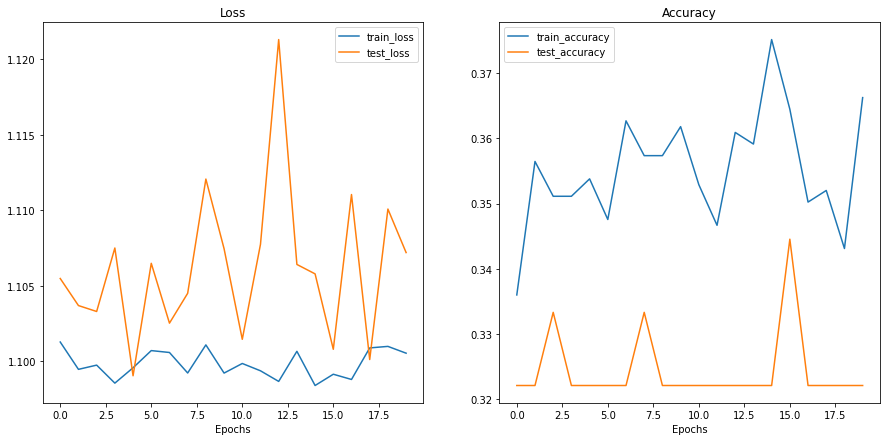

In [65]:
plot_loss_curves(model_0_results)

In [82]:
np.array([[[1,2],
          [3,4]],
         [[1,2],
          [3,4]],
         [[5,6],
          [7,8]],
         [[5,6],
          [7,8]],
         [[5,6],
          [7,8]]]).reshape(5,4)

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [5, 6, 7, 8],
       [5, 6, 7, 8],
       [5, 6, 7, 8]])